In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.models import Model
from keras.layers import Input, Dense

In [7]:
input_img = Input(shape=(784,))
encoder = Dense(128, activation="relu")(input_img)
encoder = Dense(64, activation="relu")(encoder)
encoder = Dense(32, activation="relu")(encoder)

decoder = Dense(64, activation="relu")(encoder)
decoder = Dense(128, activation="relu")(decoder)
decoder = Dense(784, activation="sigmoid")(decoder)

In [9]:
autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer="adadelta",
                   loss="binary_crossentropy")
autoencoder.fit(X_train, X_train, 
               epochs=50,
               batch_size=256,
               validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.3418 - val_loss: 0.2636
Epoch 2/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2590 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2468 - val_loss: 0.2350
Epoch 4/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2294 - val_loss: 0.2241
Epoch 5/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2199 - val_loss: 0.2113
Epoch 6/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2039 - val_loss: 0.1952
Epoch 7/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1918 - val_loss: 0.1871
Epoch 8/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1823 - val_loss: 0.1780
Epoch 9/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1764 - val_loss: 0.1722
E

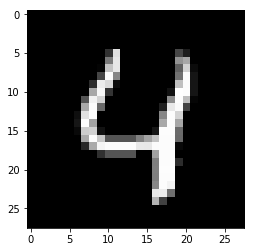

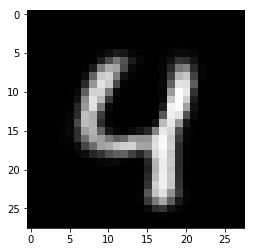

In [16]:
i = 4
plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
plt.show()

out = autoencoder.predict(X_test[i].reshape(1, -1))
plt.imshow(out[0].reshape(28, 28), cmap="gray")
plt.show()